<a href="https://colab.research.google.com/github/emolinaperez/econometrics_mek/blob/main/Week%2010/R/Lab_Splines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab: Regression with Splines Using Custom Knots

In [1]:
# 1. Load necessary libraries
library(splines)
library(ggplot2)

In [2]:
# 2. Create a synthetic dataset for demonstration
set.seed(123)  # For reproducibility
n <- 200
x <- sort(runif(n, 0, 10))  # Sorting to make visualization clearer

# Creating a non-linear relationship with different slopes in different regions
y <- 2 + 0.5*x +
  0.5*pmax(x-2, 0) -    # Change in slope at x=2
  1.5*pmax(x-4, 0) +    # Change in slope at x=4
  1.0*pmax(x-7, 0) +    # Change in slope at x=7
  rnorm(n, 0, 0.5)      # Adding some noise

# Create a data frame
data <- data.frame(x = x, y = y)

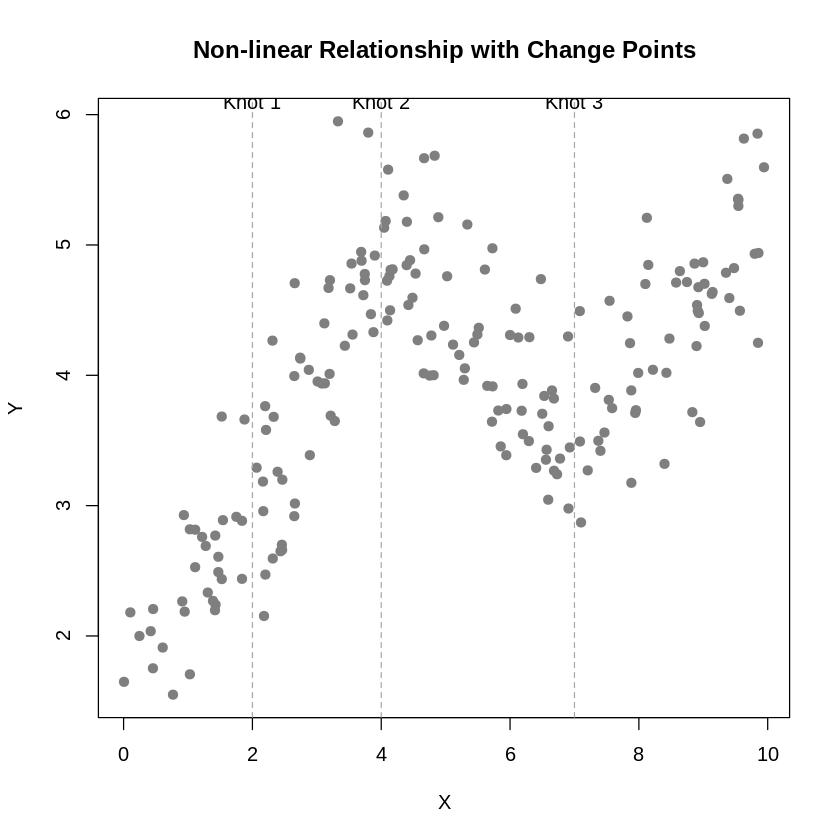

In [3]:
# 3. Visualize the raw data
plot(data$x, data$y, pch = 19, col = "gray50",
     main = "Non-linear Relationship with Change Points",
     xlab = "X", ylab = "Y")

# Add lines to show the true change points (knots)
abline(v = c(2, 4, 7), lty = 2, col = "darkgray")
text(c(2, 4, 7), rep(max(y), 3), labels = c("Knot 1", "Knot 2", "Knot 3"), pos = 3)


In [4]:
# 4. Define different knot placements for comparison

# 4.1. Quantile-based knots (common approach)
quantile_knots <- quantile(data$x, probs = c(0.25, 0.5, 0.75))
quantile_knots

# 4.2. True knots (for our synthetic data, we know these)
true_knots <- c(2, 4, 7)
true_knots

# 4.3. Equally spaced knots
equal_knots <- seq(min(data$x), max(data$x), length.out = 5)[2:4]
equal_knots

# 4.4. Manually specified knots (for demonstration)
manual_knots <- c(1, 3, 8)
manual_knots

25%      50%      75% 
2.721181 4.820961 7.333708

[1] 2 4 7

[1] 2.490360 4.974473 7.458585

[1] 1 3 8

In [5]:
# 5. Fit different spline models using different knot placements

# 5.1. Model with quantile-based knots
model_quantile <- lm(y ~ bs(x, knots = quantile_knots, degree = 1), data = data)
summary(model_quantile)


Call:
lm(formula = y ~ bs(x, knots = quantile_knots, degree = 1), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.21863 -0.40056  0.00043  0.32033  1.80315 

Coefficients:
                                           Estimate Std. Error t value Pr(>|t|)
(Intercept)                                  1.4720     0.1635   9.004   <2e-16
bs(x, knots = quantile_knots, degree = 1)1   2.3730     0.2242  10.584   <2e-16
bs(x, knots = quantile_knots, degree = 1)2   3.4127     0.1809  18.868   <2e-16
bs(x, knots = quantile_knots, degree = 1)3   1.8859     0.1962   9.612   <2e-16
bs(x, knots = quantile_knots, degree = 1)4   3.8830     0.2090  18.578   <2e-16
                                              
(Intercept)                                ***
bs(x, knots = quantile_knots, degree = 1)1 ***
bs(x, knots = quantile_knots, degree = 1)2 ***
bs(x, knots = quantile_knots, degree = 1)3 ***
bs(x, knots = quantile_knots, degree = 1)4 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 

In [6]:
# 5.2. Model with true knots
model_true <- lm(y ~ bs(x, knots = true_knots, degree = 1), data = data)
summary(model_true)


Call:
lm(formula = y ~ bs(x, knots = true_knots, degree = 1), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.98186 -0.29415 -0.05136  0.28755  1.61152 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                              1.7877     0.1802   9.920  < 2e-16 ***
bs(x, knots = true_knots, degree = 1)1   1.1421     0.2378   4.802 3.12e-06 ***
bs(x, knots = true_knots, degree = 1)2   3.2614     0.1906  17.108  < 2e-16 ***
bs(x, knots = true_knots, degree = 1)3   1.6480     0.2013   8.186 3.46e-14 ***
bs(x, knots = true_knots, degree = 1)4   3.4399     0.2118  16.244  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4766 on 195 degrees of freedom
Multiple R-squared:  0.7609,	Adjusted R-squared:  0.756 
F-statistic: 155.1 on 4 and 195 DF,  p-value: < 2.2e-16


In [7]:
# 5.3. Model with equally spaced knots
model_equal <- lm(y ~ bs(x, knots = equal_knots, degree = 1), data = data)
summary(model_equal)


Call:
lm(formula = y ~ bs(x, knots = equal_knots, degree = 1), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.25358 -0.40984 -0.00441  0.33520  1.86709 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                               1.4939     0.1781   8.390 9.74e-15
bs(x, knots = equal_knots, degree = 1)1   2.1861     0.2363   9.251  < 2e-16
bs(x, knots = equal_knots, degree = 1)2   3.3767     0.1939  17.412  < 2e-16
bs(x, knots = equal_knots, degree = 1)3   1.8633     0.2123   8.777 8.48e-16
bs(x, knots = equal_knots, degree = 1)4   3.8959     0.2257  17.262  < 2e-16
                                           
(Intercept)                             ***
bs(x, knots = equal_knots, degree = 1)1 ***
bs(x, knots = equal_knots, degree = 1)2 ***
bs(x, knots = equal_knots, degree = 1)3 ***
bs(x, knots = equal_knots, degree = 1)4 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual s

In [8]:
# 5.4. Model with manually specified knots
model_manual <- lm(y ~ bs(x, knots = manual_knots, degree = 1), data = data)
summary(model_manual)


Call:
lm(formula = y ~ bs(x, knots = manual_knots, degree = 1), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.34207 -0.33494 -0.03522  0.35434  1.46481 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                               1.93117    0.30928   6.244 2.61e-09
bs(x, knots = manual_knots, degree = 1)1  0.07226    0.36359   0.199    0.843
bs(x, knots = manual_knots, degree = 1)2  2.60114    0.31713   8.202 3.13e-14
bs(x, knots = manual_knots, degree = 1)3  1.86426    0.32590   5.720 3.95e-08
bs(x, knots = manual_knots, degree = 1)4  3.40769    0.34784   9.797  < 2e-16
                                            
(Intercept)                              ***
bs(x, knots = manual_knots, degree = 1)1    
bs(x, knots = manual_knots, degree = 1)2 ***
bs(x, knots = manual_knots, degree = 1)3 ***
bs(x, knots = manual_knots, degree = 1)4 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 

In [9]:
# 5.5. Model with default spline (no explicit knots)
model_default <- lm(y ~ bs(x, df = 6), data = data)
summary(model_default)


Call:
lm(formula = y ~ bs(x, df = 6), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.12439 -0.32105 -0.02356  0.27951  1.62003 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      2.0514     0.2861   7.171 1.54e-11 ***
bs(x, df = 6)1  -0.3494     0.4869  -0.718    0.474    
bs(x, df = 6)2   1.8909     0.3065   6.169 3.95e-09 ***
bs(x, df = 6)3   3.3594     0.3751   8.955 2.86e-16 ***
bs(x, df = 6)4   0.2000     0.3485   0.574    0.567    
bs(x, df = 6)5   3.1718     0.3865   8.205 3.20e-14 ***
bs(x, df = 6)6   3.0412     0.3523   8.633 2.21e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4969 on 193 degrees of freedom
Multiple R-squared:  0.7427,	Adjusted R-squared:  0.7347 
F-statistic: 92.84 on 6 and 193 DF,  p-value: < 2.2e-16


In [10]:
# 6. Make predictions and visualize the fits

# Create a grid for predictions
grid <- data.frame(x = seq(min(data$x), max(data$x), length.out = 200))

# Generate predictions for each model
grid$pred_quantile <- predict(model_quantile, newdata = grid)
grid$pred_true <- predict(model_true, newdata = grid)
grid$pred_equal <- predict(model_equal, newdata = grid)
grid$pred_manual <- predict(model_manual, newdata = grid)
grid$pred_default <- predict(model_default, newdata = grid)

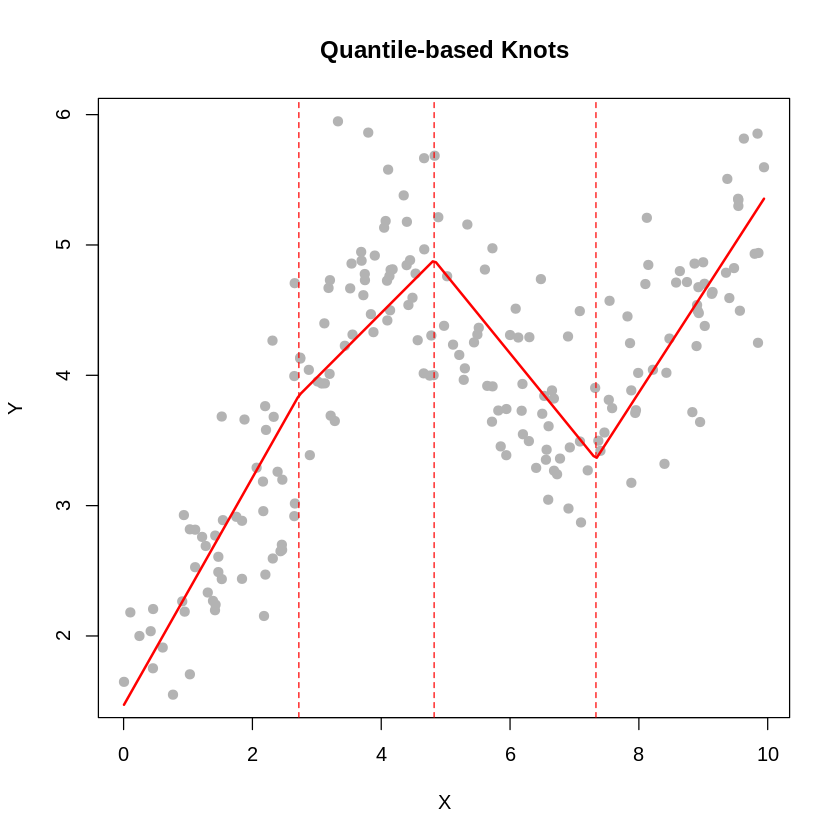

In [11]:
# Plot for quantile-based knots
plot(data$x, data$y, pch = 19, col = "gray70", main = "Quantile-based Knots",
     xlab = "X", ylab = "Y", ylim = range(data$y))
lines(grid$x, grid$pred_quantile, col = "red", lwd = 2)
abline(v = quantile_knots, lty = 2, col = "red")

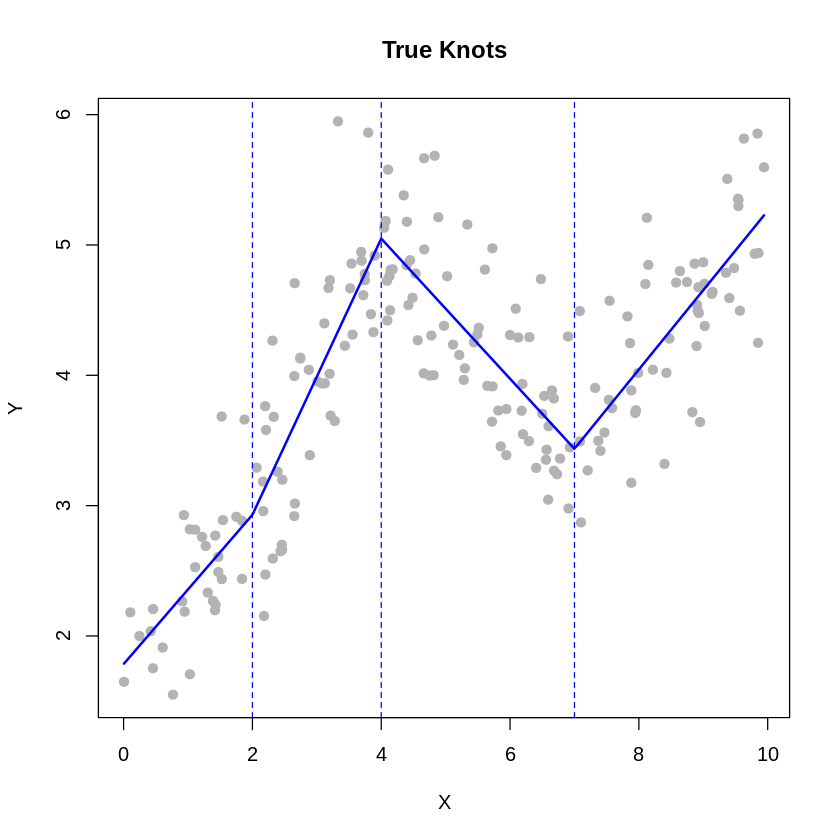

In [12]:
# Plot for true knots
plot(data$x, data$y, pch = 19, col = "gray70", main = "True Knots",
     xlab = "X", ylab = "Y", ylim = range(data$y))
lines(grid$x, grid$pred_true, col = "blue", lwd = 2)
abline(v = true_knots, lty = 2, col = "blue")

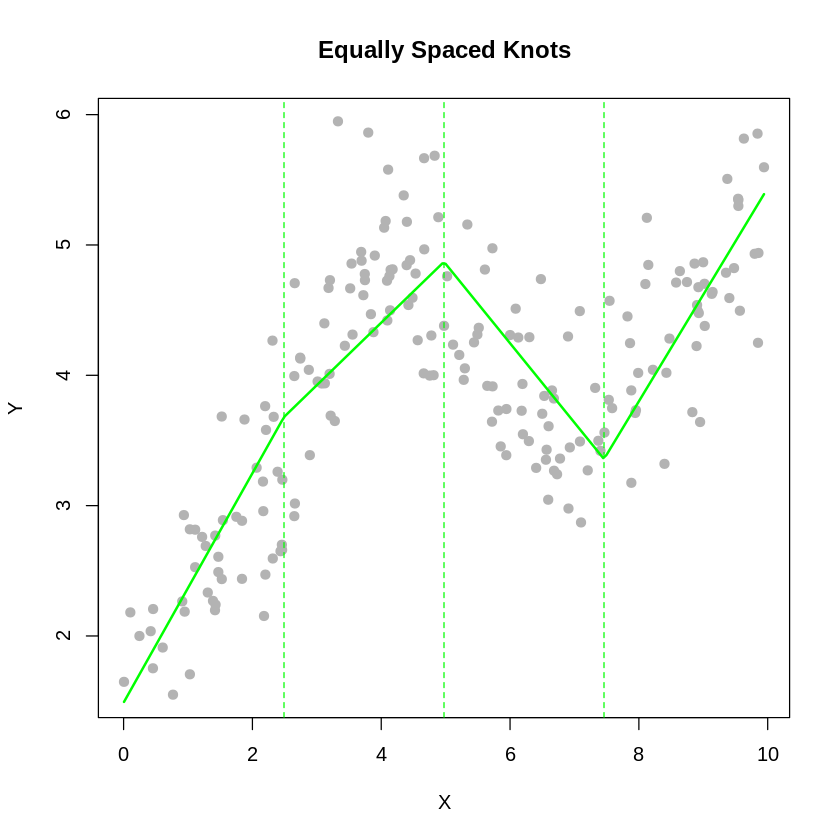

In [13]:
# Plot for equally spaced knots
plot(data$x, data$y, pch = 19, col = "gray70", main = "Equally Spaced Knots",
     xlab = "X", ylab = "Y", ylim = range(data$y))
lines(grid$x, grid$pred_equal, col = "green", lwd = 2)
abline(v = equal_knots, lty = 2, col = "green")

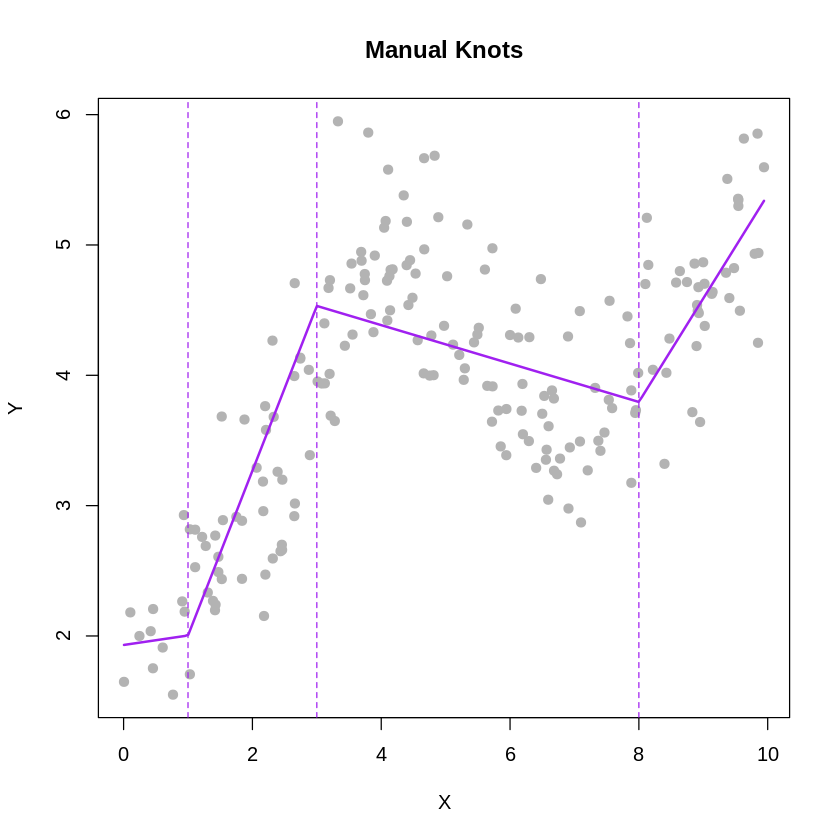

In [14]:
# Plot for manually specified knots
plot(data$x, data$y, pch = 19, col = "gray70", main = "Manual Knots",
     xlab = "X", ylab = "Y", ylim = range(data$y))
lines(grid$x, grid$pred_manual, col = "purple", lwd = 2)
abline(v = manual_knots, lty = 2, col = "purple")

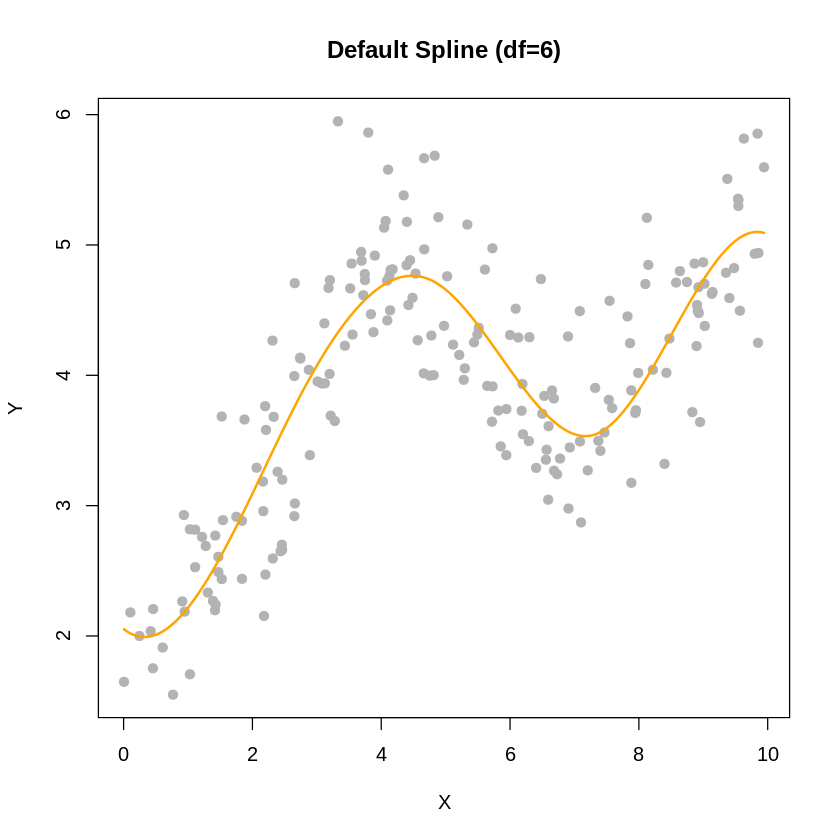

In [15]:
# Plot for default spline (no explicit knots)
plot(data$x, data$y, pch = 19, col = "gray70", main = "Default Spline (df=6)",
     xlab = "X", ylab = "Y", ylim = range(data$y))
lines(grid$x, grid$pred_default, col = "orange", lwd = 2)


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


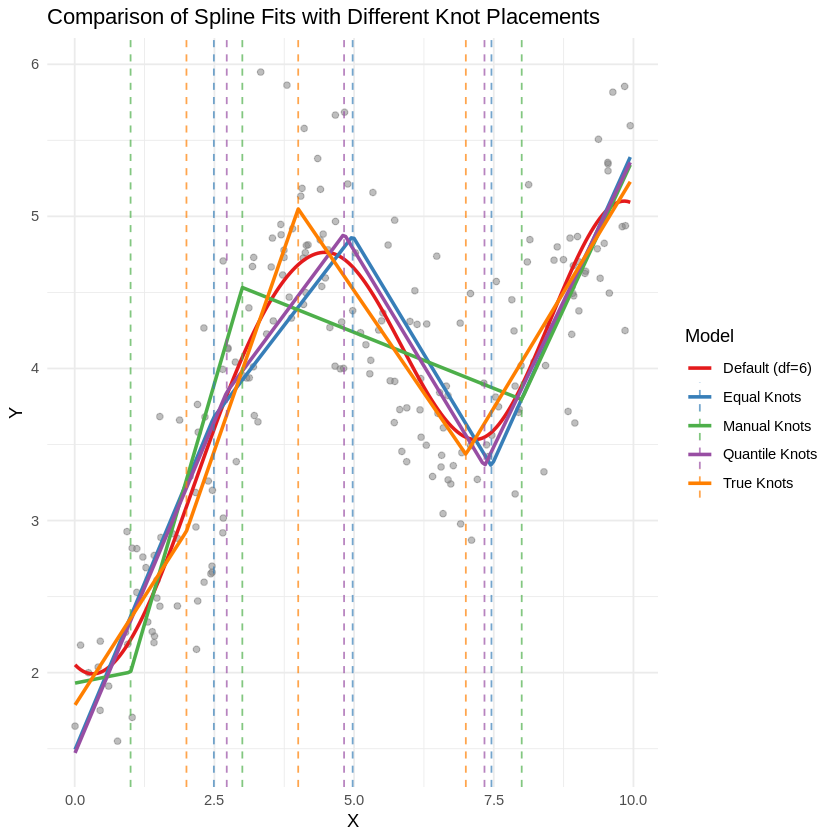

In [16]:
# 7. Compare model fits with a combined ggplot
plot_data <- rbind(
  data.frame(x = grid$x, y = grid$pred_quantile, Model = "Quantile Knots"),
  data.frame(x = grid$x, y = grid$pred_true, Model = "True Knots"),
  data.frame(x = grid$x, y = grid$pred_equal, Model = "Equal Knots"),
  data.frame(x = grid$x, y = grid$pred_manual, Model = "Manual Knots"),
  data.frame(x = grid$x, y = grid$pred_default, Model = "Default (df=6)")
)

# Create knots data for visualization
knots_data <- rbind(
  data.frame(x = quantile_knots, Model = "Quantile Knots"),
  data.frame(x = true_knots, Model = "True Knots"),
  data.frame(x = equal_knots, Model = "Equal Knots"),
  data.frame(x = manual_knots, Model = "Manual Knots")
)

# Plot with ggplot
ggplot() +
  geom_point(data = data, aes(x = x, y = y), color = "gray50", alpha = 0.5) +
  geom_line(data = plot_data, aes(x = x, y = y, color = Model), size = 1) +
  geom_vline(data = knots_data, aes(xintercept = x, color = Model),
             linetype = "dashed", alpha = 0.7) +
  scale_color_brewer(palette = "Set1") +
  labs(title = "Comparison of Spline Fits with Different Knot Placements",
       x = "X", y = "Y") +
  theme_minimal()

In [17]:
# 8. Model comparison based on adjusted R² and AIC
models <- list(
  "Quantile Knots" = model_quantile,
  "True Knots" = model_true,
  "Equal Knots" = model_equal,
  "Manual Knots" = model_manual,
  "Default (df=6)" = model_default
)

model_stats <- data.frame(
  Model = names(models),
  R2_adj = sapply(models, function(m) summary(m)$adj.r.squared),
  AIC = sapply(models, AIC),
  BIC = sapply(models, BIC)
)

In [18]:
# Sort by adjusted R²
model_stats <- model_stats[order(-model_stats$R2_adj), ]
print(model_stats)

                        Model    R2_adj      AIC      BIC
True Knots         True Knots 0.7559713 278.0398 297.8297
Default (df=6) Default (df=6) 0.7346837 296.7053 323.0918
Quantile Knots Quantile Knots 0.7050744 315.9273 335.7172
Equal Knots       Equal Knots 0.6802320 332.1018 351.8917
Manual Knots     Manual Knots 0.6502546 350.0237 369.8136


In [19]:
# 9. Try different degree splines with the true knots
# Linear splines (degree=1) - already fitted as model_true

# Quadratic splines (degree=2)
model_quad <- lm(y ~ bs(x, knots = true_knots, degree = 2), data = data)
summary(model_quad)


Call:
lm(formula = y ~ bs(x, knots = true_knots, degree = 2), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.24847 -0.36976  0.01726  0.34103  1.50449 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                              2.1602     0.2872   7.521 1.97e-12 ***
bs(x, knots = true_knots, degree = 2)1  -0.5542     0.4159  -1.333 0.184242    
bs(x, knots = true_knots, degree = 2)2   2.5159     0.2911   8.641 2.05e-15 ***
bs(x, knots = true_knots, degree = 2)3   2.1849     0.3315   6.592 4.01e-10 ***
bs(x, knots = true_knots, degree = 2)4   1.2009     0.3288   3.652 0.000335 ***
bs(x, knots = true_knots, degree = 2)5   3.4729     0.3420  10.154  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5391 on 194 degrees of freedom
Multiple R-squared:  0.6956,	Adjusted R-squared:  0.6877 
F-statistic: 88.65 on 5 and 194 DF,  p-value: < 2.2e-16


In [20]:
# Cubic splines (degree=3)
model_cubic <- lm(y ~ bs(x, knots = true_knots, degree = 3), data = data)
summary(model_cubic)


Call:
lm(formula = y ~ bs(x, knots = true_knots, degree = 3), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.02466 -0.30355 -0.05272  0.30912  1.58302 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                              1.7594     0.3067   5.737 3.68e-08 ***
bs(x, knots = true_knots, degree = 3)1   0.5321     0.4891   1.088   0.2780    
bs(x, knots = true_knots, degree = 3)2   0.7591     0.3260   2.329   0.0209 *  
bs(x, knots = true_knots, degree = 3)3   4.4033     0.3824  11.514  < 2e-16 ***
bs(x, knots = true_knots, degree = 3)4   0.2911     0.3639   0.800   0.4248    
bs(x, knots = true_knots, degree = 3)5   3.2573     0.3901   8.351 1.30e-14 ***
bs(x, knots = true_knots, degree = 3)6   3.3855     0.3610   9.378  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4828 on 193 degrees of freedom
Multiple R-squared:  0.7571,	Adjusted R

In [21]:
# Make predictions
grid$pred_linear <- predict(model_true, newdata = grid)  # Already computed
grid$pred_quad <- predict(model_quad, newdata = grid)
grid$pred_cubic <- predict(model_cubic, newdata = grid)

In [22]:
# Compare different degree splines
degree_data <- rbind(
  data.frame(x = grid$x, y = grid$pred_linear, Degree = "Linear (degree=1)"),
  data.frame(x = grid$x, y = grid$pred_quad, Degree = "Quadratic (degree=2)"),
  data.frame(x = grid$x, y = grid$pred_cubic, Degree = "Cubic (degree=3)")
)


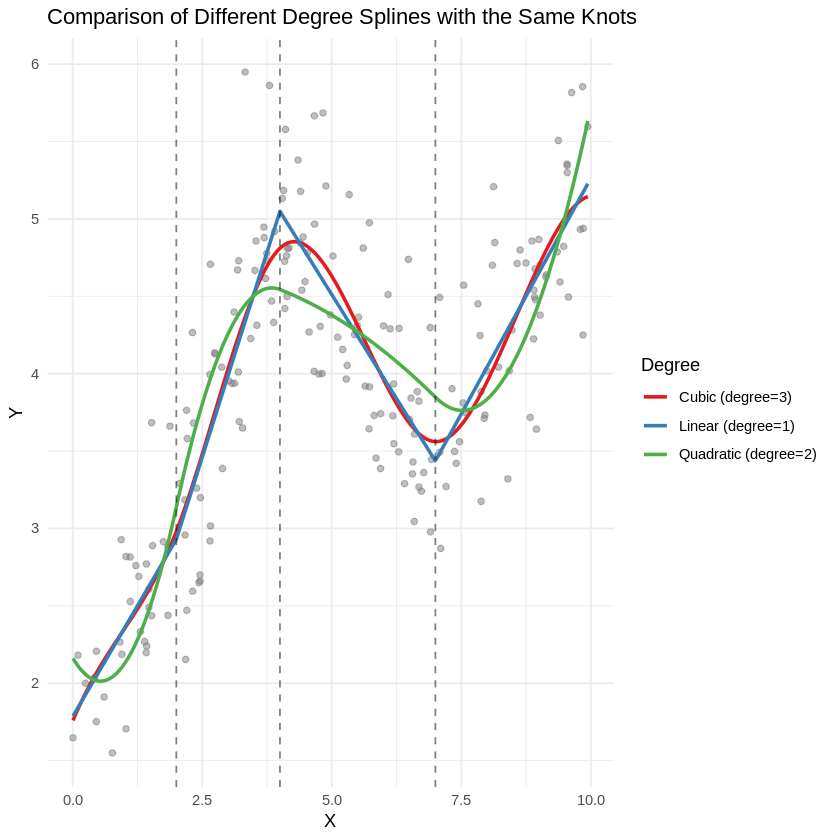

In [23]:
# Plot with ggplot
ggplot() +
  geom_point(data = data, aes(x = x, y = y), color = "gray50", alpha = 0.5) +
  geom_line(data = degree_data, aes(x = x, y = y, color = Degree), size = 1) +
  geom_vline(xintercept = true_knots, linetype = "dashed", color = "black", alpha = 0.5) +
  scale_color_brewer(palette = "Set1") +
  labs(title = "Comparison of Different Degree Splines with the Same Knots",
       x = "X", y = "Y") +
  theme_minimal()

In [24]:
# Compare models with different degrees
degree_models <- list(
  "Linear (degree=1)" = model_true,
  "Quadratic (degree=2)" = model_quad,
  "Cubic (degree=3)" = model_cubic
)

degree_stats <- data.frame(
  Model = names(degree_models),
  R2_adj = sapply(degree_models, function(m) summary(m)$adj.r.squared),
  AIC = sapply(degree_models, AIC),
  BIC = sapply(degree_models, BIC)
)

# Sort by adjusted R²
degree_stats <- degree_stats[order(-degree_stats$R2_adj), ]
print(degree_stats)


                                    Model    R2_adj      AIC      BIC
Linear (degree=1)       Linear (degree=1) 0.7559713 278.0398 297.8297
Cubic (degree=3)         Cubic (degree=3) 0.7495560 285.1679 311.5544
Quadratic (degree=2) Quadratic (degree=2) 0.6877106 328.3404 351.4287
